In [1]:
@time using Plots
@time using Statistics
@time using Distributions

 42.945453 seconds (25.97 M allocations: 1.368 GiB, 2.63% gc time)
  0.203781 seconds (132.40 k allocations: 6.585 MiB)
  7.131722 seconds (3.96 M allocations: 210.726 MiB, 0.82% gc time)


In [2]:
function RK4integrate(t::Float64, y::Float64, dt::Float64, f)
    F1 = dt*f(t, y)
    F2 = dt*f(t + dt/2, y + F1/2)
    F3 = dt*f(t + dt/2, y + F2/2)
    F4 = dt*f(t + dt, y + F3)
    
    return y + (F1 + 2*F2 + 2*F3 + F4)/6
end

RK4integrate (generic function with 1 method)

In [3]:
function forwardEuler(y::Float64, dt::Float64, f)
    return y + dt*f(y)
end

forwardEuler (generic function with 1 method)

In [4]:
function gaussian(N, mu, sig)
    return rand(Normal(mu, sig), N)
end

gaussian (generic function with 1 method)

In [5]:
function lorentzian(N, mu, sig)
    return rand(Cauchy(mu, sig), N)
end

lorentzian (generic function with 1 method)

In [43]:
function kuramotoModel(N, κ, dFunc, nSteps, Δt, σ)
    ω = dFunc(N, 0, σ)  #initial frequency distribution
    θ = 2*pi*rand(Float64, (N)) #phase of each oscillator
    ψ = zeros(Float64, (nSteps)) #mean phase
    r = zeros(Float64, (nSteps)) #mean radius
    
    for k in 1:nSteps
        θsum = mean(cis.(θ))
        ψ[k], r[k] = angle(θsum), abs(θsum)

        for i in 1:length(θ)
            θ[i] += Δt * (ω[i] + κ*r[k]*sin(ψ[k] - θ[i]))
        end
    end
    
    #plot(Δt*collect(1:length(r)), r, lw = 2, ylim = (0,1),  xlabel = "t", ylabel = "r(t)", label = "r(t)", color = :red)
    #return(mean(r[nSteps - 12500, end]))
    plot(ψ, r, proj = :polar, lw = 2, label = "Control parameter")
end

kuramotoModel (generic function with 1 method)

In [52]:
k = collect(0:0.5:4)
@time begin 
kuramotoModel(1000, 3.0, gaussian, Int(1.5e5), 1e-3, 1) 
end

  6.852090 seconds (152.30 k allocations: 2.258 GiB, 1.00% gc time)


In [14]:
k = vcat(collect(0:0.25:11))
R = zeros(Float64, length(k))
sig = 3.5 #2.5*sqrt(pi/2)

@time begin
    for i in 1:length(k)
        R[i] = kuramotoModel(2500, k[i], rejectionSample, Int(5e4), 1e-3,sig) 
    end
end

387.538387 seconds (4.50 M allocations: 84.023 GiB, 0.72% gc time)


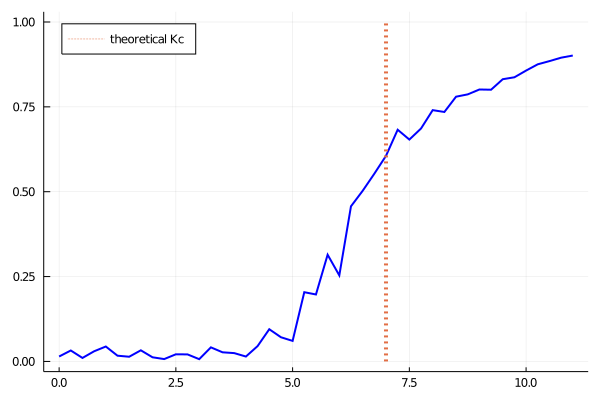

In [15]:
scatter(k, R, lw = 2, legend = :topleft, xlabel = "K", ylabel = "r", label = "r vs. K")
plot(k, R, lw = 2, label = "", color = :blue)
plot!(KcCalc(sig)*ones(3),0:0.5:1.0, lw = 2, line = (:dot, 4), label = "theoretical Kc", legend = :topleft)

In [12]:
function KcCalc(sig)
    #return sqrt(8/pi)*sig
    return 2*sig
end

KcCalc (generic function with 1 method)

In [10]:
pdf(sig, x) = 1/pi * sig/(x^2 + sig^2)

function rejectionSample(N, dummy, sig)          # To generate a lorentzian weighted distribution of w 
    i, x_list = 1, zeros(N)

    while(i < N + 1)
        x=20*rand() - 10   # Generate a uniform random number between some apt finite range of x.
        y=rand()    # Generate a uniform random number between 0 and y_max
        
        if(pdf(sig ,x)>y)    # if the random y value < pdf(x), then accept that point.
            x_list[i] = x
            i += 1
        end
    end
    return x_list
end

rejectionSample (generic function with 1 method)

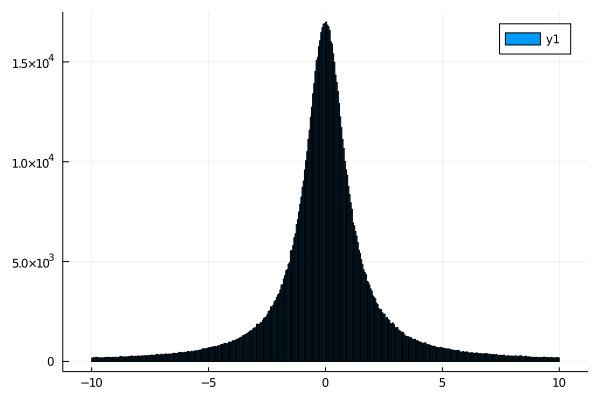

In [11]:
histogram(rejectionSample(1000000,0,1))